In [2]:
import rasterio
from rasterio.plot import show
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Hacker\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
image = rasterio.open('GRAY_HR_SR_OB.tif')

In [4]:
image.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 21600,
 'height': 10800,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.01666666666667, 0.0, -180.0,
        0.0, -0.01666666666667, 90.00000000000001)}

In [5]:
image_arr = image.read()

In [6]:
np.shape(image_arr)

(1, 10800, 21600)

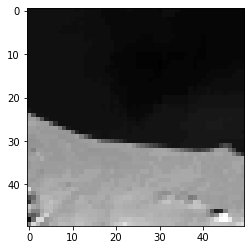

In [7]:
plt.imshow(image_arr[0][3120:3170, 13750:13800], cmap='gray')

In [8]:
hormoz_image = image_arr[0][3120:3170, 13750:13800]

In [9]:
np.shape(hormoz_image)

(50, 50)

In [10]:
from sklearn.feature_extraction import image

In [11]:
image.img_to_graph(hormoz_image)

<2500x2500 sparse matrix of type '<class 'numpy.uint8'>'
	with 12300 stored elements in COOrdinate format>

In [12]:
cm = image.img_to_graph(hormoz_image)

In [14]:
cm.data  = np.exp(-cm.data / cm.data.std())

In [ ]:
sc = SpectralClustering(n_clusters=2, n_jobs=-1, assign_labels='cluster_qr')
sc.fit(cm)

C:\Users\Hacker\anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:658: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\Hacker\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
labels = sc.labels_

In [ ]:
np.unique(labels, return_counts=True)

In [ ]:
labels_im = np.full(np.shape(hormoz_image), -1.)

In [ ]:
labels_im

In [ ]:
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

In [ ]:
hormoz_cls

In [ ]:
labels_im

In [ ]:
hormoz_image

In [ ]:
plt.matshow(labels_im)
plt.matshow(hormoz_image)